# Examen de mineria de datos. 
# Proyecto mineria de datos: WeatherAUS

Integrantes:<br>
* Camilo Garcia 16.717.409-4<br>
* Matias Cisternas 19.993.975-0<br>
* Carlos Gonzales 20.123.004-7<br>

Indice:<br>
1) Descripcion del contexto<br>
2) Proposito del proyecto<br>
3) Justificacion del proyecto<br>
4) Analisis del EDA<br>
5) Intervenciones en el dataset (transformacion de datos)<br>
6) Normalizacion/standarizacion  de datos<br>
7) Aplicacion de modelos<br>
8) Analisis de metricas<br>
9) Conclusiones<br>

# 1-Descripcion del contexto

AUSTRALIA es uno de los paises mas grandes del mundo, con un clima semiarido donde hace  calor la mayor parte del año, asi como posee tierra arida tambien posee tierras fertiles las cuales se concentran en el sureste y suroeste. Asutralia cuenta con seis estados.

las principales características climáticas australianas son inviernos suaves y veranos cálidos, así como abundante sol y poca humedad.Las precipitaciones son muy escasas en el interior y aumentan en las zonas costeras, de modo que las zonas mejor regadas son los litorales norte, este, sudeste y sudoeste.

debido a su diversidad climática, se dan todo tipo de fenómenos naturales extremos como sequías, inundaciones, ciclones tropicales, vendavales, incendios forestales (en lo que se conoce como bush o monte en Australia) y, ocasionalmente, tornados

# 2-Proposito del proyecto

Nuestro objetivo es crear un modelo que nos permite predecir si mañana llovera o no en australia. para asi obtener informacion que  permita sacar mayor provecho a las lluvias en un pais semi arido como australia.

# 3-Justificacion del proyecto

Siendo el agua un recurso muy improtante en un pais semi arido como australia, el agua como recurso valioso no se puede desperdiciar, entonces es primordial poder proyectar y predecir cuando llovera  en el pais para tomar medidas y almacenar dicho elemento.

# Analisis de datos (EDA) 

In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 4.1. Carga de los datos

In [57]:
# (1) Realizar la carga de datos
data_weather = pd.read_csv('weatherAUS.csv')

In [58]:
data_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [59]:
data_weather.shape

(142193, 24)

El set de datos esta compuesto de 142.193 observaciones meteorologicas diarias en Australia. Ademas, se incluyen 24 caracteristicas para cada uno de ellos.

In [60]:
#Informacion de los datos
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#  4.2 Tratamiento de valores nulos en las variables numéricas

Busqueda de valores nulos y sus porcentajes

In [61]:
# Obtenemos las variables numericas
numerical = [num for num in data_weather.columns if data_weather[num].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

In [62]:
nulos_num = data_weather[numerical].isnull().sum()
porc_nulos_num = data_weather[numerical].isnull().sum() / data_weather.shape[0] * 100 
frame_num = pd.DataFrame({'Valores nulos': nulos_num , 'Porcentaje': porc_nulos_num})
frame_num

,Valores nulos,Porcentaje
MinTemp,637,0.447983
MaxTemp,322,0.226453
Rainfall,1406,0.988797
Evaporation,60843,42.789026
Sunshine,67816,47.692924
WindGustSpeed,9270,6.519308
WindSpeed9am,1348,0.948007
WindSpeed3pm,2630,1.849599
Humidity9am,1774,1.247600
Humidity3pm,3610,2.538803


Para aquellas características que poseen cerca o mas del 40% de sus valores como nulos (Evaporation, Sunshine, Cloud3pm, Cloud9am). Seran eliminadas del estudio, ya que al ser un valor tan alto, si las reemplazaramos por el promedio, el análisis se veria perjudicado retornando valores incorrectos o alejados de lo esperado.

In [63]:
# Seleccionamos las caracteristicas numericas con un porcentaje de nulos mayor a 20%
drop_num = list(frame_num[frame_num['Porcentaje'] > 20].index)
drop_num

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [64]:
data_weather.drop(drop_num, axis=1, inplace=True)

Para el resto de variables numéricas con nulos, seran reemplazadas por el valor promedio de cada una

In [65]:
trat_num = list(frame_num[(frame_num['Porcentaje'] <= 20) & (frame_num['Porcentaje'] > 0)].index)
#trat_num = list(frame_num.index)
trat_num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [66]:
for num in trat_num:
    promedio = data_weather[num].mean()
    data_weather[num] = data_weather[num].fillna(promedio)
# Comprobamos el resultado del tratamiento
data_weather[trat_num].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [67]:
# Al eliminar variables se vuelve a cargar
numerical = [num for num in data_weather.columns if data_weather[num].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

# 4.3 Tratamiento de valores nulos en las variables categóricas

Busqueda de valores nulos y sus porcentajes

In [68]:
# Obtenemos las variables categoricas
categorical = [cat for cat in data_weather.columns if data_weather[cat].dtype =='O']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [69]:
nulos_cat = data_weather[categorical].isnull().sum()
porc_nulos_cat = data_weather[categorical].isnull().sum() / data_weather.shape[0] * 100 
frame_cat = pd.DataFrame({'Valores nulos': nulos_cat , 'Porcentaje': porc_nulos_cat})
frame_cat

,Valores nulos,Porcentaje
Date,0,0.000000
Location,0,0.000000
WindGustDir,9330,6.561504
WindDir9am,10013,7.041838
WindDir3pm,3778,2.656952
RainToday,1406,0.988797
RainTomorrow,0,0.000000


Si bien existen nulos, estos no superan el 10% de los datos en cada categoria, por lo tanto, seran reemplazados por el valor mas común en cada característica

In [70]:
# Obtenemos caracteristicas categoricas con valores nulos
trat_cat = list(frame_cat[frame_cat['Porcentaje'] > 0].index)
trat_cat

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [71]:
for cat in trat_cat:
    moda = data_weather[cat].mode()[0]
    data_weather[cat] = data_weather[cat].fillna(moda)
# Comprobamos el resultado del tratamiento
data_weather[trat_cat].isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

# 4.4 Graficos y Analisis

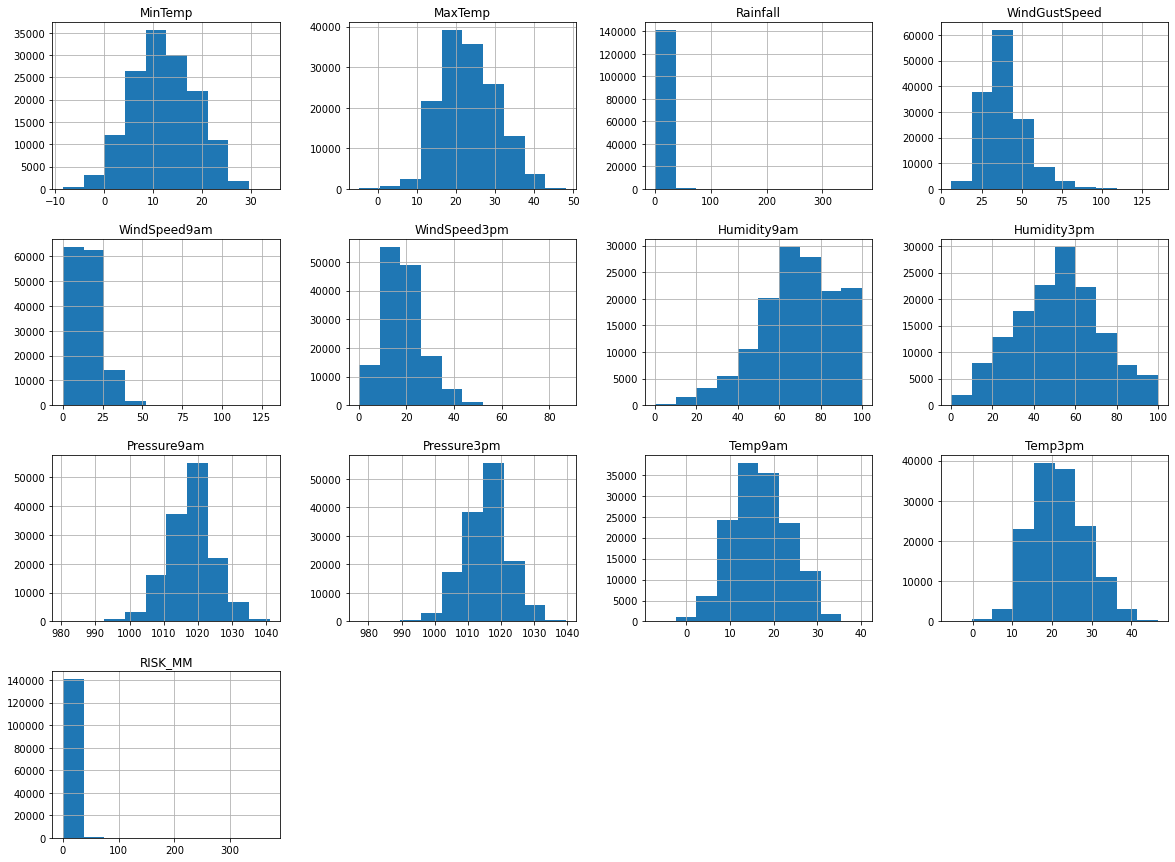

In [94]:
data_weather[numerical].hist(bins=10, figsize = (20,15))
plt.savefig('Distribución de variables numericas.png')
plt.show()

Los histogramas nos muestran que algunas variables siguen una distribución normal, como lo es
**Humidity3pm, MinTemp, Temp9am** mientras que algunas están muy sesgadas como lo son **Evaporation y Rainfall**.

In [95]:
data_weather[categorical].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,142193,142193,142193,142193,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,19110,21406,14441,110738,110316


In [96]:
print(data_weather['RainTomorrow'].value_counts())
print(data_weather['RainToday'].value_counts())

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64
No     110738
Yes     31455
Name: RainToday, dtype: int64


,Cantidad,Porcentaje
No,110316,77.581878
Yes,31877,22.418122


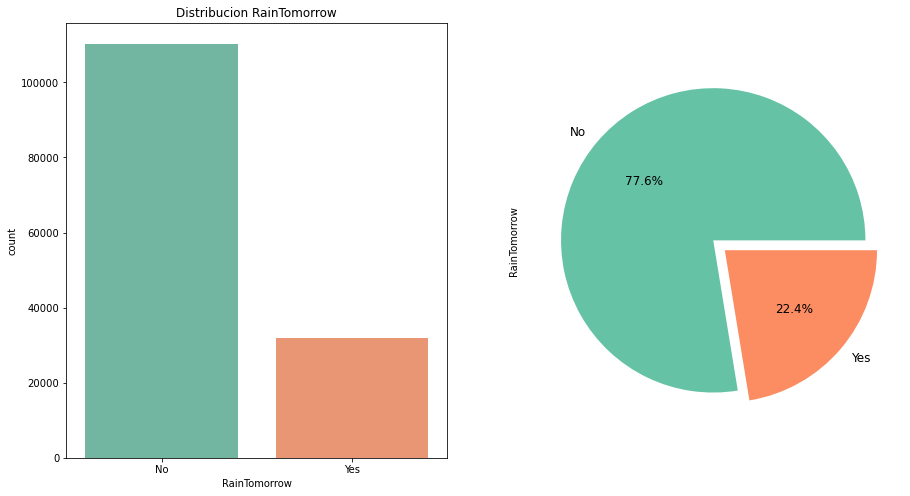

In [97]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Distribucion RainTomorrow')
x=sns.countplot(x=data_weather['RainTomorrow'], palette='Set2')

plt.subplot(1,2,2)
data_weather['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0.1],textprops={'fontsize': 12}, 
                                                   colors=['#66c2a5','#fc8d62'])

pd.DataFrame({'Cantidad': data_weather['RainTomorrow'].value_counts(),
              'Porcentaje': (data_weather['RainTomorrow'].value_counts()/data_weather.shape[0] * 100) })

La variable RainTomorrow tiene una gran cantidad de observaciones con resultado de que no llovera al dia siguiente y solo una pequeña parte tiene como resultado que si llovera. 

In [98]:
data_weather[numerical].describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,2.360682
std,6.388924,7.109554,8.423217,13.138385,8.851082,8.721551,18.932077,20.532065,6.746248,6.681788,6.472166,6.870771,8.477969
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,0.000000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,1015.258204,16.800000,21.300000,0.000000
75%,16.800000,28.200000,0.800000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,0.800000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,371.000000


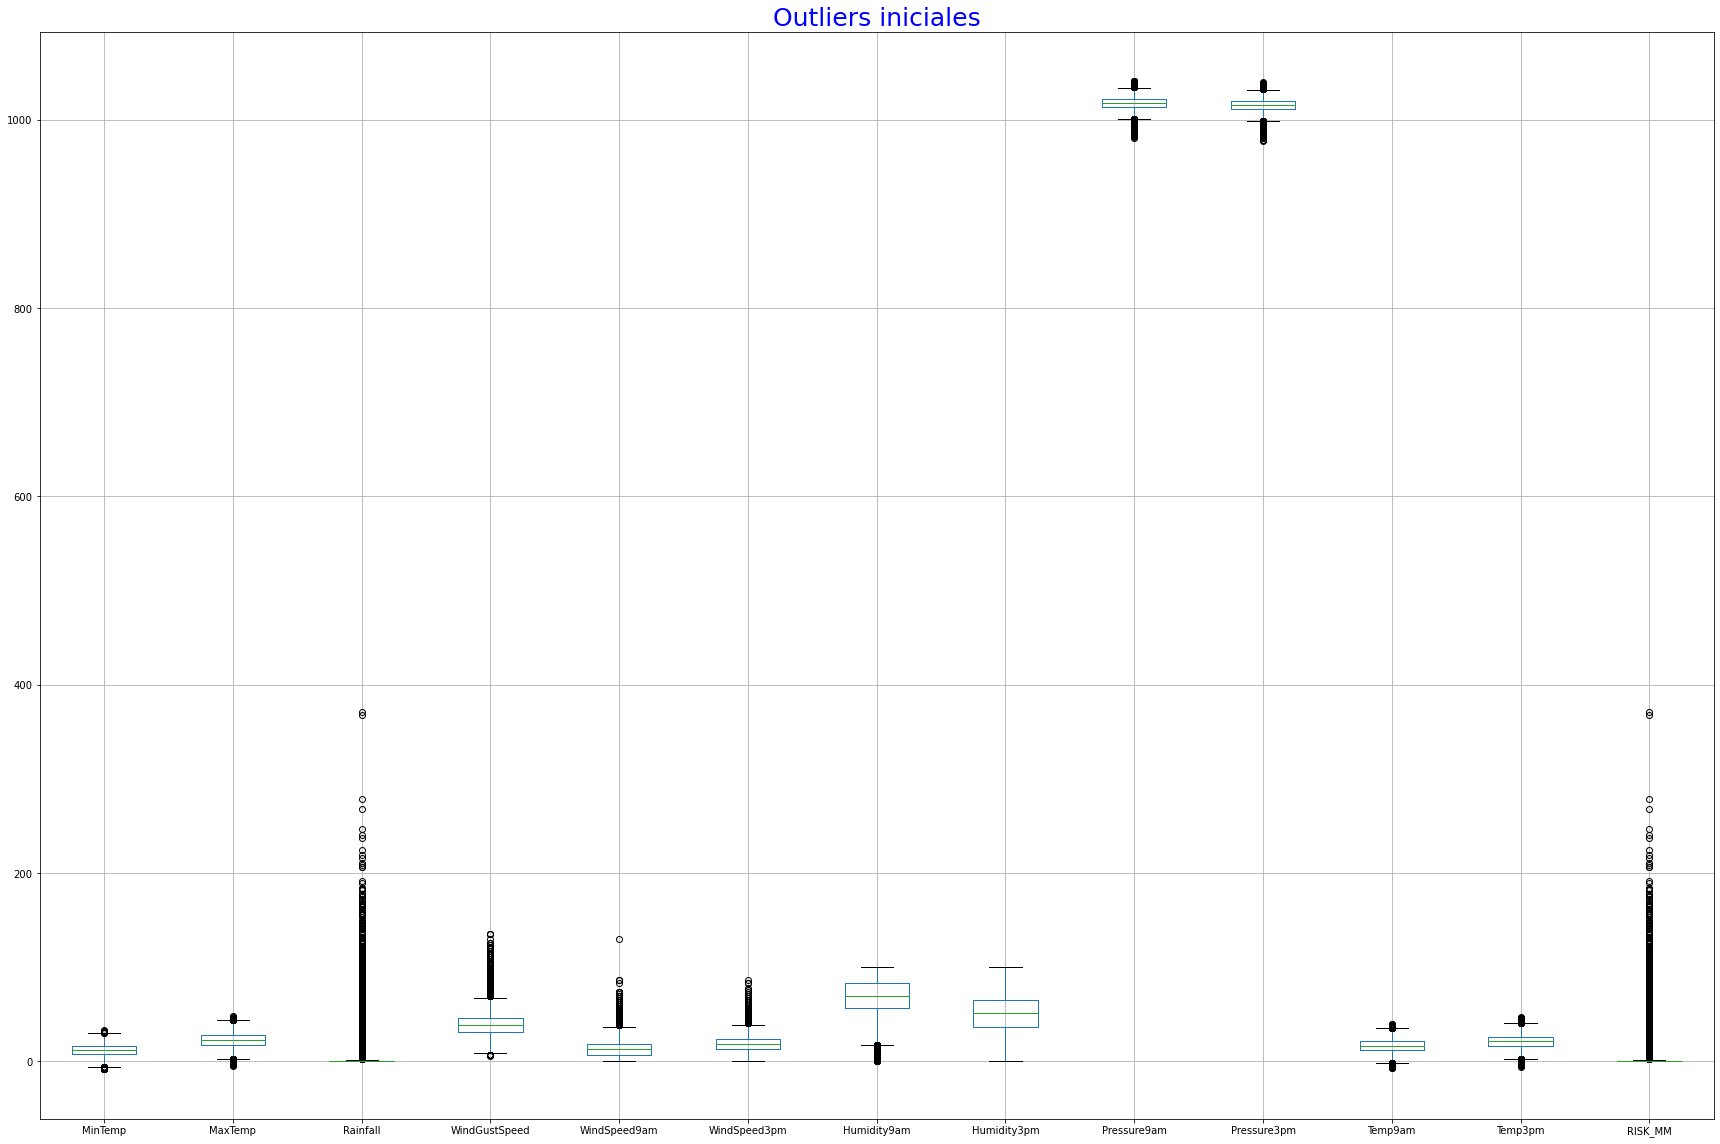

In [99]:
data_weather[numerical].boxplot( figsize =(30,20))
plt.savefig('Deteccion de outliers iniciales.png')
plt.title("Outliers iniciales",fontsize=25,color="blue")
plt.show()

Los diagramas de caja revelan una gran cantidad de valores atípicos en **RainFall, Evaporation, WindGustSpeed, WindSpeed9am y  WindSpeed3pm**

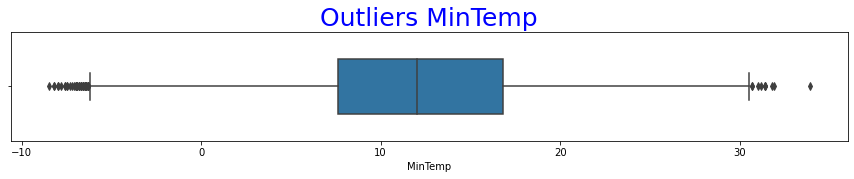

In [100]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["MinTemp"],fliersize=5, width=0.5)
plt.title("Outliers MinTemp",fontsize=25,color="blue")
plt.savefig('Outliers MinTemp.png')

In [76]:
#Obtenemos el primer y tercer cuartil de la variable MinTemp
Q1 = data_weather['MinTemp'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['MinTemp'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['MinTemp'].median()
print("Mediana:",Mediana)

Primer cuartil: 7.6
Tercer Cuartil: 16.8
Rango Intercuartil: 9.200000000000001
Mediana: 12.0


MinTemp siendo una de las variables mas normalizadas esta equilibrada al centro, la mayor concentracion de temperaturas se
se haya entre Q3 a Q1, sus outlaiers no estan tan alejados

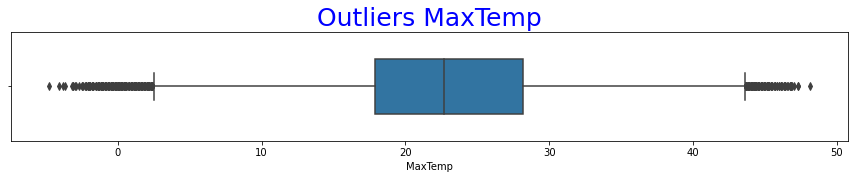

In [101]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["MaxTemp"],fliersize=5, width=0.5)
plt.title("Outliers MaxTemp",fontsize=25,color="blue")
plt.savefig('Outliers MaxTemp.png')

In [77]:
#Obtenemos el primer y tercer cuartil de la variable MaxTemp
Q1 = data_weather['MaxTemp'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['MaxTemp'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['MaxTemp'].median()
print("Mediana:",Mediana)

Primer cuartil: 17.9
Tercer Cuartil: 28.2
Rango Intercuartil: 10.3
Mediana: 22.7


MaxTemp siendo una de las variables mas normalizadas esta equilibrada al centro, la mayor concentracion de temperaturas se
se haya entre Q3 a Q1, sus outlaiers no estan tan alejados

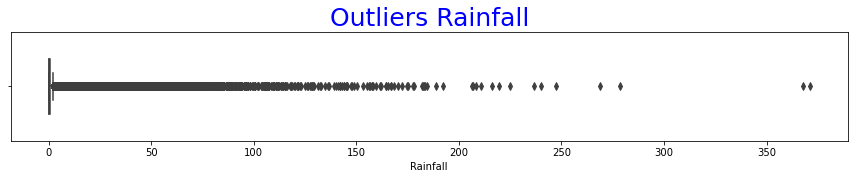

In [102]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["Rainfall"],fliersize=5, width=0.5)
plt.title("Outliers Rainfall",fontsize=25,color="blue")
plt.savefig('Outliers Rainfall.png')

Recordando el histograma de Rainfall,cantidad de lluvia registrada ese día en mm. la mayor parte de su data esta bajo el 50, po lo tanto sus outlaiers tiene a estar muy sesgados a la derecho, esto se puede interpretar como que normalmente no llueven muchos milimetros de agua, son raras las ocasiones donde llueve mucho

In [78]:
#Obtenemos el primer y tercer cuartil de la variable MinTemp
Q1 = data_weather['Rainfall'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['Rainfall'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['Rainfall'].median()
print("Mediana:",Mediana)

Primer cuartil: 0.0
Tercer Cuartil: 0.8
Rango Intercuartil: 0.8
Mediana: 0.0


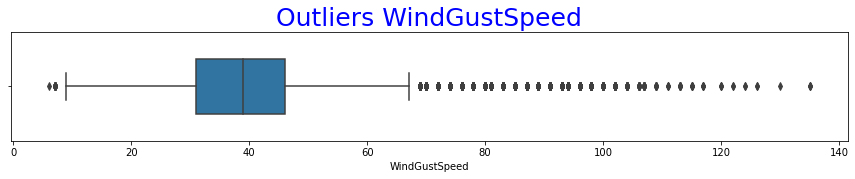

In [103]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["WindGustSpeed"],fliersize=5, width=0.5)
plt.title("Outliers WindGustSpeed",fontsize=25,color="blue")
plt.savefig('Outliers WindGustSpeed.png')

In [188]:
#Obtenemos el primer y tercer cuartil de la variable WindGustSpeed
Q1 = data_weather['WindGustSpeed'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['WindGustSpeed'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['WindGustSpeed'].median()
print("Mediana:",Mediana)

Primer cuartil: 31.0
Tercer Cuartil: 46.0
Rango Intercuartil: 15.0
Mediana: 39.0


Windgustseep velocidad de rafaga de viento tiene una media de XXXX, por lo cual los vientos 
aunque elevados rara vez estan sobre los  6X km/hr de velocidad, esta sesgada a la derecha

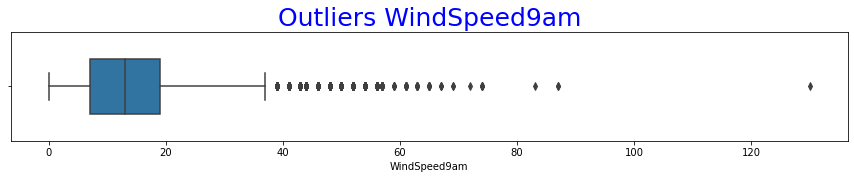

In [104]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["WindSpeed9am"],fliersize=5, width=0.5)
plt.title("Outliers WindSpeed9am",fontsize=25,color="blue")
plt.savefig('Outliers WindSpeed9am.png')

In [189]:
#Obtenemos el primer y tercer cuartil de la variable WindSpeed9am
Q1 = data_weather['WindSpeed9am'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['WindSpeed9am'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['WindSpeed9am'].median()
print("Mediana:",Mediana)

Primer cuartil: 7.0
Tercer Cuartil: 19.0
Rango Intercuartil: 12.0
Mediana: 13.0


La rafa de viento a las 9am o windspeed9am, en general los vientos a esa no son tan fuertes, bajo los 40 Km/h,
se da en pocos casos que el viento supera esa cifra. esta sesgada a la derecha

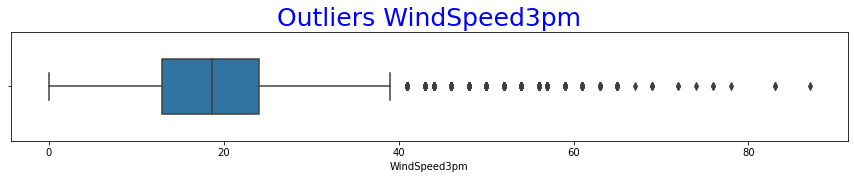

In [105]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["WindSpeed3pm"],fliersize=5, width=0.5)
plt.title("Outliers WindSpeed3pm",fontsize=25,color="blue")
plt.savefig('Outliers WindSpeed3pm.png')

In [190]:
#Obtenemos el primer y tercer cuartil de la variable WindSpeed3pm
Q1 = data_weather['WindSpeed3pm'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['WindSpeed3pm'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['WindSpeed3pm'].median()
print("Mediana:",Mediana)

Primer cuartil: 13.0
Tercer Cuartil: 24.0
Rango Intercuartil: 11.0
Mediana: 18.63757586179718


Tambien en a las 3 de la tarde la rafa de viento esta bajo los 40km/h,mientras que en pocas ocasiones
supere el valor,  esta sesgada a la derecha.

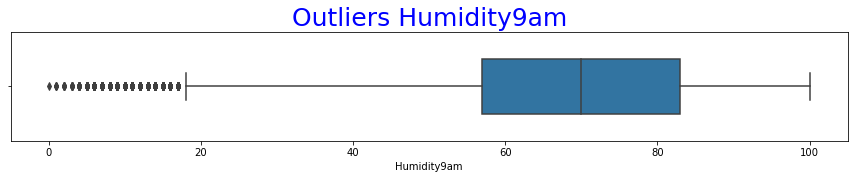

In [106]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["Humidity9am"],fliersize=5, width=0.5)
plt.title("Outliers Humidity9am",fontsize=25,color="blue")
plt.savefig('Outliers Humidity9am.png')

In [191]:
#Obtenemos el primer y tercer cuartil de la variable Humidity9am
Q1 = data_weather['Humidity9am'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['Humidity9am'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['Humidity9am'].median()
print("Mediana:",Mediana)

Primer cuartil: 57.0
Tercer Cuartil: 83.0
Rango Intercuartil: 26.0
Mediana: 70.0


En cuanto a la humedad a las 9 am, el grafico se encuentra sesgado hacia la izquierda, en general la  humedad oscila entre
el segundo y tecer cuartil, los  outlaiers estan hacia la izquierda entonces  ovbiamente si hay 
humedad baja significa que hace mucho calor, en general en las mañana la humedad tiende a ser alta, pero
hay momento de calor que bajan intensamente la humedad y crean outlaiers sesgado a la izquier

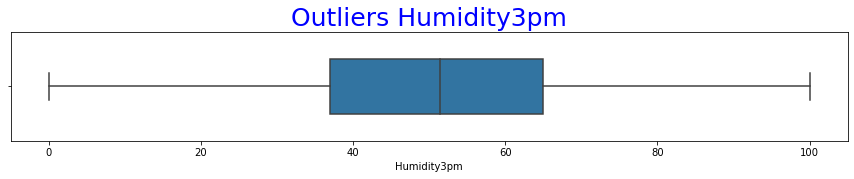

In [107]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["Humidity3pm"],fliersize=5, width=0.5)
plt.title("Outliers Humidity3pm",fontsize=25,color="blue")
plt.savefig('Outliers Humidity3pm.png')

In [192]:
#Obtenemos el primer y tercer cuartil de la variable Humidity3pm
Q1 = data_weather['Humidity3pm'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['Humidity3pm'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['Humidity3pm'].median()
print("Mediana:",Mediana)

Primer cuartil: 37.0
Tercer Cuartil: 65.0
Rango Intercuartil: 28.0
Mediana: 51.482606091656265


La humedad en cambio a las tres de la tarde es la mas normalizada y no tiene outlaiers

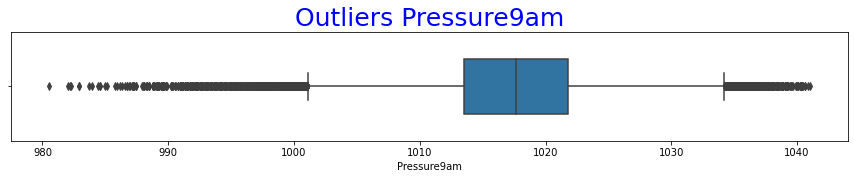

In [108]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["Pressure9am"],fliersize=5, width=0.5)
plt.title("Outliers Pressure9am",fontsize=25,color="blue")
plt.savefig('Outliers Pressure9am.png')

In [193]:
#Obtenemos el primer y tercer cuartil de la variable Pressure9am
Q1 = data_weather['Pressure9am'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['Pressure9am'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['Pressure9am'].median()
print("Mediana:",Mediana)

Primer cuartil: 1013.5
Tercer Cuartil: 1021.8
Rango Intercuartil: 8.299999999999955
Mediana: 1017.6537584159781


La observación de la presión es un indicador importante,una rápida disminución de la presión atmosférica indica mal tiempo (precipitaciones y viento), mientras que una presión alta indica un tiempo estable y generalmente agradable con cielos despejados.

en este grafico vemos datos sesgados a la izquierda entonces la bajas presiones coinciden  con los dias lluviosos porque entre menos presion mayor posibilidad de lluvia.

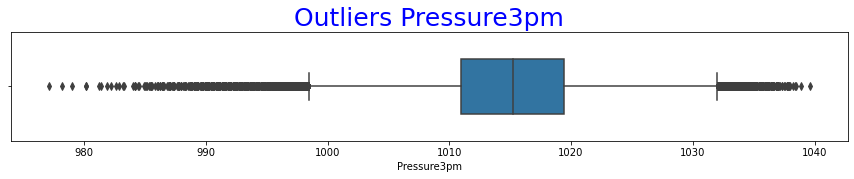

In [109]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["Pressure3pm"],fliersize=5, width=0.5)
plt.title("Outliers Pressure3pm",fontsize=25,color="blue")
plt.savefig('Outliers Pressure3pm.png')

In [194]:
#Obtenemos el primer y tercer cuartil de la variable Pressure3pm
Q1 = data_weather['Pressure3pm'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['Pressure3pm'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['Pressure3pm'].median()
print("Mediana:",Mediana)

Primer cuartil: 1011.0
Tercer Cuartil: 1019.4
Rango Intercuartil: 8.399999999999977
Mediana: 1015.258203537907


La presion a las3 pm  si lo comparamos con las presion a las 9 am no son tan diferente, la mayor parte del tiempo la presion
es estable ese implica un clima estable pero cuando la presion baja y cae hacia los outlayer a la izquierda la presion disminuye y es posible que llueva.

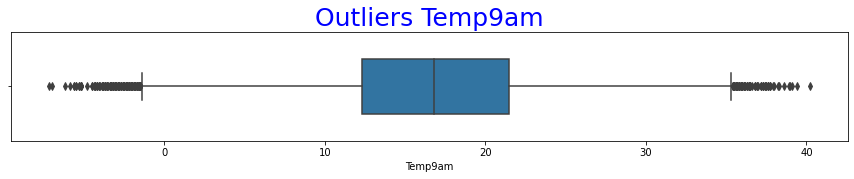

In [110]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["Temp9am"],fliersize=5, width=0.5)
plt.title("Outliers Temp9am",fontsize=25,color="blue")
plt.savefig('Outliers Temp9am.png')

In [195]:
#Obtenemos el primer y tercer cuartil de la variable Temp9am
Q1 = data_weather['Temp9am'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['Temp9am'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['Temp9am'].median()
print("Mediana:",Mediana)

Primer cuartil: 12.3
Tercer Cuartil: 21.5
Rango Intercuartil: 9.2
Mediana: 16.8


La temperatura a las 9 am(Temp9Am) nos indica que la mayoria de la veces la temperatura a las 9 am oscila entre los 13 hasta 22 grados, pero en ocasiones está excede los 35 grados de 
temperatura podiendo llegar a 40°c. Tambien se muestra que la temperatura a las 9 am puede llegar a tempraturas bajo cero.
La variable se encuentra sesgada hacia ambos lados en proporciones similares.

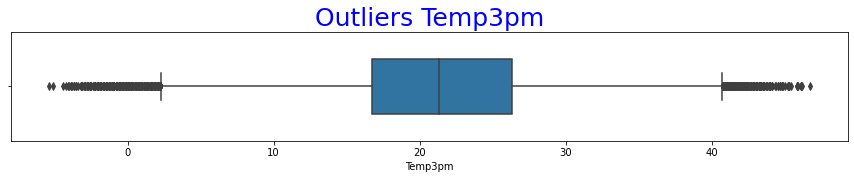

In [111]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["Temp3pm"],fliersize=5, width=0.5)
plt.title("Outliers Temp3pm",fontsize=25,color="blue")
plt.savefig('Outliers Temp3pm.png')

In [196]:
#Obtenemos el primer y tercer cuartil de la variable Temp3pm
Q1 = data_weather['Temp3pm'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['Temp3pm'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['Temp3pm'].median()
print("Mediana:",Mediana)

Primer cuartil: 16.7
Tercer Cuartil: 26.3
Rango Intercuartil: 9.600000000000001
Mediana: 21.3


La temperatura a las 3 pm(Temp3pm) nos indica que la mayoria de la veces la temperatura a las 3 pm oscila entre los 17 hasta 26 grados, pero en ocasiones está excede los 40 grados o 
tambien puede qué la temperatura en algunas oportunidades baje de 1 grado llegando hasta temperaturas bajo cero.
La variable se encuentra sesgada hacia ambos lados en proporciones similares.

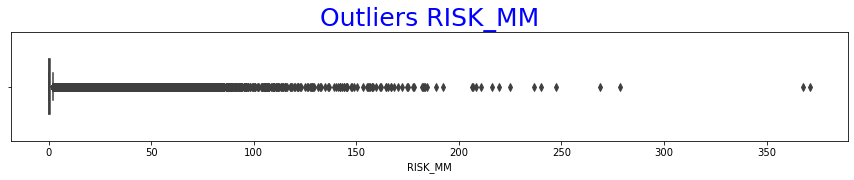

In [187]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data_weather["RISK_MM"],fliersize=5, width=0.5)
plt.title("Outliers RISK_MM",fontsize=25,color="blue")
plt.savefig('Outliers RISK_MM.png')

In [197]:
#Obtenemos el primer y tercer cuartil de la variable Temp3pm
Q1 = data_weather['RISK_MM'].quantile(0.25)
print("Primer cuartil:", Q1)
Q3 = data_weather['RISK_MM'].quantile(0.75)
print("Tercer Cuartil:", Q3)
#Calculamos el Rango Intercuartil
IQR = Q3 - Q1
print("Rango Intercuartil:",IQR)
#Mostramos la mediana
Mediana = data_weather['RISK_MM'].median()
print("Mediana:",Mediana)

Primer cuartil: 0.0
Tercer Cuartil: 0.8
Rango Intercuartil: 0.8
Mediana: 0.0


Cantidad e intensidad de lluvia, cómo debe describirse la intensidad de precipitación,
entre mas intensa mayor  en la cantidad de agua caida y por lo tanto se vuelve mas torrencial
en nuestro grafico vemos que esta sesgada a la izquierda
esto siginifca que la lluvia esta concentrada en baja cantidad e intensidad de lluvia
por la tanto en palabras simples llueve poco
mientras que los outlair son con una gran cantidad de ml esto significa 
que esas lluvias fueron fuerte o torrenciale

# 4.5 Graficos de matriz de correlacion

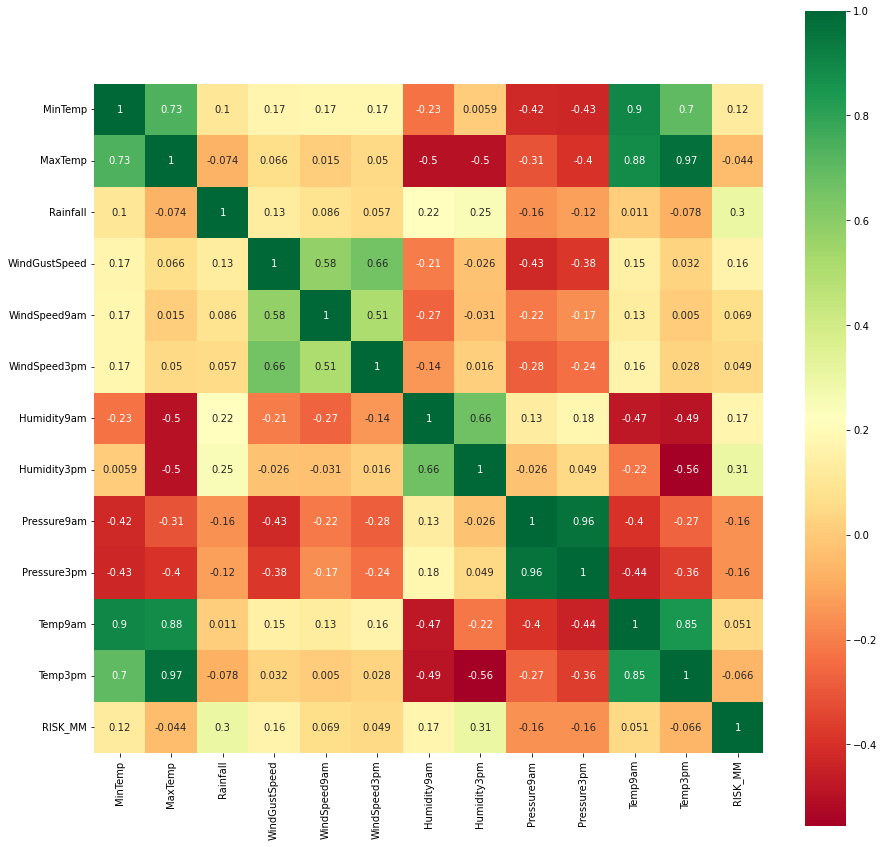

In [112]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data_weather.corr(), annot=True,cmap='RdYlGn',square=True)
plt.show()

Al no existir una correlación clara con las variables numericas, realizaremos la transformación de las variables categoricas

# 5 Transformacion de datos

Se realizarán transformaciones a la gran mayoria de los valores categoricos. De esta manera, estaran listo para ser procesados por el modelo. Utilizaré OneHotEncoder para transformarlos, ya que puede retornar mejores resultados que LabelEncoder.

In [150]:
df_regresion = data_weather[:]

In [151]:
df_regresion['Location'] = pd.Categorical(df_regresion['Location'])
datasetDummies_Location = pd.get_dummies(df_regresion['Location'], prefix = 'Location')

df_regresion['WindGustDir'] = pd.Categorical(df_regresion['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(df_regresion['WindGustDir'], prefix = 'WindGustDir')

df_regresion['WindDir9am'] = pd.Categorical(df_regresion['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(df_regresion['WindDir9am'], prefix = 'WindDir9am')

df_regresion['WindDir3pm'] = pd.Categorical(df_regresion['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(df_regresion['WindDir3pm'], prefix = 'WindDir3pm')

df_regresion['RainToday'] = pd.Categorical(df_regresion['RainToday'])
datasetDummies_RainToday = pd.get_dummies(df_regresion['RainToday'], prefix = 'RainToday')

df_regresion['RainTomorrow'] = pd.Categorical(df_regresion['RainTomorrow'])
datasetDummies_RainTomorrow = pd.get_dummies(df_regresion['RainTomorrow'], prefix = 'RainTomorrow')

In [152]:
df_regresion.drop("Location", axis=1, inplace=True)
df_regresion.drop("WindGustDir", axis=1, inplace=True)
df_regresion.drop("WindDir9am", axis=1, inplace=True)
df_regresion.drop("WindDir3pm", axis=1, inplace=True)
df_regresion.drop("RainToday", axis=1, inplace=True)
df_regresion.drop("RainTomorrow", axis=1, inplace=True)

df_regresion = pd.concat([df_regresion, datasetDummies_Location], axis=1)
df_regresion = pd.concat([df_regresion, datasetDummies_WindGustDir], axis=1)
df_regresion = pd.concat([df_regresion, datasetDummies_WindDir9am], axis=1)
df_regresion = pd.concat([df_regresion, datasetDummies_WindDir3pm], axis=1)
df_regresion = pd.concat([df_regresion, datasetDummies_RainToday], axis=1)
df_regresion = pd.concat([df_regresion, datasetDummies_RainTomorrow], axis=1)

Como observamos anteriormente, la caracteristica Date es de tipo object. Esta sera transformada a un formato datetime para un mejor analisis

In [153]:
df_regresion['Date'] = pd.to_datetime(df_regresion['Date'])

df_regresion['Year'] = df_regresion['Date'].dt.year

df_regresion['Month'] = df_regresion['Date'].dt.month

df_regresion['Day'] = df_regresion['Date'].dt.day

# Eliminamos la columna anterior que contenia la fecha
df_regresion.drop('Date', axis=1, inplace = True)
#Creamos la variable season para ver la temporada segun el mes
df_regresion['Season'] = df_regresion['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Summer','Summer','Autumn','Autumn','Autumn','Winter','Winter','Winter','Spring','Spring','Spring','Summer'))

df_regresion.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,1,0,1,0,1,0,2008,12,1,Summer
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,1,1,0,1,0,2008,12,2,Summer
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,1,1,0,1,0,2008,12,3,Summer
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,1,0,1,0,2008,12,4,Summer
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,1,0,1,0,2008,12,5,Summer


Esto fue realizado para que los analisis entorno a esta caracteristicas fueran mas representativos, que si se trabajara la caracteristica Date como una sola, de esta manera la podremos utilizar como dia, mes o año.

In [154]:
df_regresion['Season'].replace(['Summer','Autumn','Winter','Spring'],[1,2,3,4],inplace = True)

Transformamos la nueva variable season en datos numericos del 1 al 4 

In [163]:
labelencoder = LabelEncoder()
df_regresion['Year'] = labelencoder.fit_transform(df_regresion['Year'])
df_regresion['Month'] = labelencoder.fit_transform(df_regresion['Month'])
df_regresion['Day'] = labelencoder.fit_transform(df_regresion['Day'])
df_regresion

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,1,0,1,0,1,0,1,11,0,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,1,1,0,1,0,1,11,1,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,1,1,0,1,0,1,11,2,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,1,0,1,0,1,11,3,1
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,1,0,1,0,1,11,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,1,0,1,0,10,5,19,3
142189,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,1,0,1,0,10,5,20,3
142190,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,1,0,1,0,10,5,21,3
142191,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,1,0,1,0,1,0,10,5,22,3


# 6 Aplicacion de modelos

# 6.1 Modelo NaiveBayes

In [72]:
df_sinNormalizar = data_weather[:]

In [73]:
df_sinNormalizar['RainTomorrow'] = df_sinNormalizar['RainTomorrow'].map( {'No':0, 'Yes': 1})

In [74]:
df_sinNormalizar['Location'] = pd.Categorical(df_sinNormalizar['Location'])
datasetDummies_Location = pd.get_dummies(df_sinNormalizar['Location'], prefix = 'Location')

df_sinNormalizar['WindGustDir'] = pd.Categorical(df_sinNormalizar['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(df_sinNormalizar['WindGustDir'], prefix = 'WindGustDir')

df_sinNormalizar['WindDir9am'] = pd.Categorical(df_sinNormalizar['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(df_sinNormalizar['WindDir9am'], prefix = 'WindDir9am')

df_sinNormalizar['WindDir3pm'] = pd.Categorical(df_sinNormalizar['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(df_sinNormalizar['WindDir3pm'], prefix = 'WindDir3pm')

df_sinNormalizar['RainToday'] = pd.Categorical(df_sinNormalizar['RainToday'])
datasetDummies_RainToday = pd.get_dummies(df_sinNormalizar['RainToday'], prefix = 'RainToday')

In [75]:
df_sinNormalizar.drop("Location", axis=1, inplace=True)
df_sinNormalizar.drop("WindGustDir", axis=1, inplace=True)
df_sinNormalizar.drop("WindDir9am", axis=1, inplace=True)
df_sinNormalizar.drop("WindDir3pm", axis=1, inplace=True)
df_sinNormalizar.drop("RainToday", axis=1, inplace=True)

df_sinNormalizar = pd.concat([df_sinNormalizar, datasetDummies_Location], axis=1)
df_sinNormalizar = pd.concat([df_sinNormalizar, datasetDummies_WindGustDir], axis=1)
df_sinNormalizar = pd.concat([df_sinNormalizar, datasetDummies_WindDir9am], axis=1)
df_sinNormalizar = pd.concat([df_sinNormalizar, datasetDummies_WindDir3pm], axis=1)
df_sinNormalizar = pd.concat([df_sinNormalizar, datasetDummies_RainToday], axis=1)

In [85]:
X = df_sinNormalizar.drop(['RainTomorrow','RISK_MM','Date'], axis=1)
y = df_sinNormalizar['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(X_test.shape)

(113754, 111)
(28439, 111)


In [82]:
# Creacion del modelo
modelo = GaussianNB()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validacion 
y_pred = modelo.predict(X_test)

In [86]:
print(f" R2  puntaje árbol de Regresión simple: {r2_score(y_test,y_pred)}")
print(f" MAE puntaje árbol de Regresión simple: {mean_absolute_error(y_test,y_pred)}")
print(f" MSE puntaje árbol de Regresión simple: {mean_squared_error(y_test,y_pred)}")

 R2  puntaje árbol de Regresión simple: -1.098706575986852
 MAE puntaje árbol de Regresión simple: 0.36871901262351
 MSE puntaje árbol de Regresión simple: 0.36871901262351


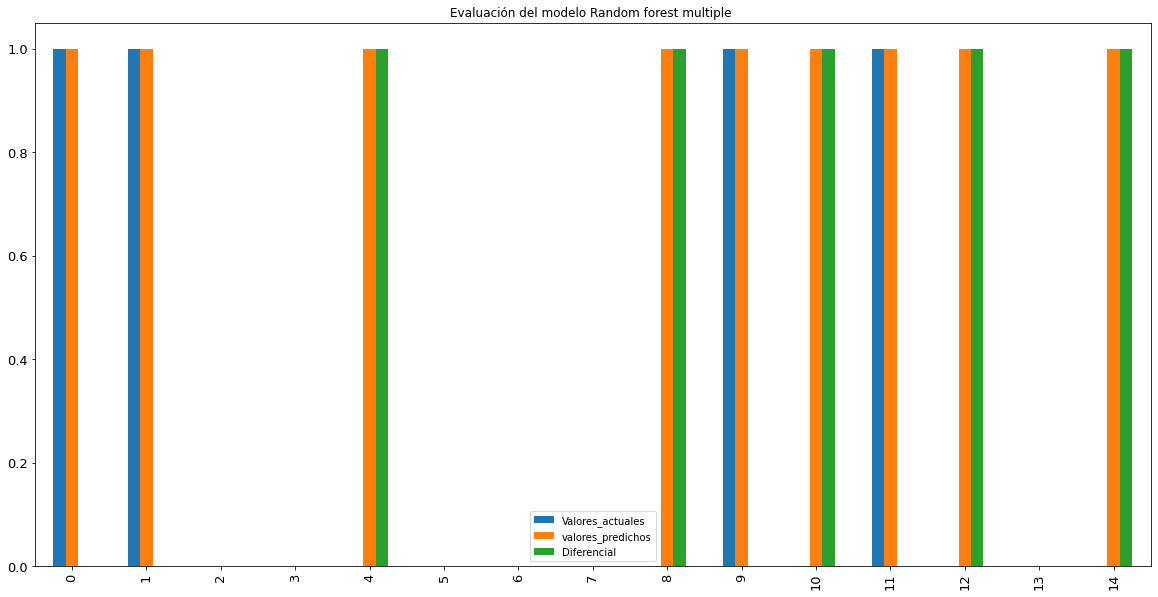

In [87]:
#comparativa de lo predicho contra la prueba
evaluate = pd.DataFrame({ 
    'Valores_actuales': y_test.values.flatten(),
    'valores_predichos': np.around(y_pred.flatten(),2),
    'Diferencial': np.around(y_pred.flatten(),2)-y_test.values.flatten()})
evaluate.head(15).plot(figsize=(20, 10), title = "Evaluación del modelo Random forest multiple ",fontsize= 13, kind='bar');

In [23]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion:')
print(matriz)

Matriz de confusion:
[[13431  8541]
 [ 1945  4522]]


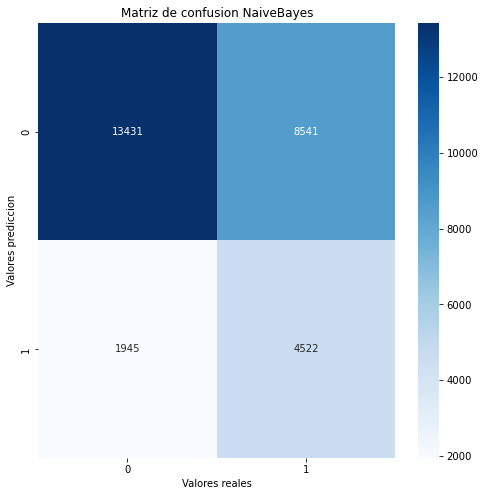

In [24]:
plt.figure(figsize=(8,8))

matriz = pd.DataFrame(confusion_matrix(y_test, y_pred))
matriz.index.name = 'Valores prediccion'
matriz.columns.name = 'Valores reales'

sns.heatmap(matriz, annot=True,fmt='d',cmap="Blues")

plt.title("Matriz de confusion NaiveBayes")
plt.show()

La matriz de confusion muestra 17953 datos predichos correctamente (13431 + 4522) y 10486 datos incorrectos (8541 + 1945)

En este caso, se distribuyen de la siguiente manera:

* En 13431 observaciones donde se declaraba que no llovería, el algoritmo predijo correctamente que no llovería.
* En 4522 observaciones donde el resultado era que llovería, el algoritmo predijo correctamente que llovería
* En 1945 observaciones donde se declaraba que no llovería, el algoritmo predijo incorrectamente que llovería
* En 8541 observaciones donde el resultado era que llovería, el algoritmo predijo incorrectamente que no lloveria.

# 6.1.2 Resultados del modelo - NaiveBayes 

In [25]:
acc_nb = accuracy_score(y_test, y_pred)
prec_nb = precision_score(y_test, y_pred)
print('Precision del modelo: ', prec_nb)
print('Accuracy del modelo: ', acc_nb)

Precision del modelo:  0.3461685677103269
Accuracy del modelo:  0.6312809873764901


La precision puede ser definida como el porcentaje de resultados positivos predecidos correctamente de todos los resultados positivos, es decir el modelo tuvo un 34% de exito al predecir los resultados positivos correctamente.
El accuracy indica el porcentaje de predicciones correctas respecto al total de observaciones, en este caso el modelo obtuvo un 63% de predicciones correctas con respecto al total de predicciones realizadas.

# 6.1.3 Comprobando si existe overfitting o underfitting

In [26]:
print(modelo.score(X_train,y_train))
print(modelo.score(X_test,y_test))

0.6327865393744396
0.6312809873764901


El accuracy obtenido tanto como en entrenamiento como en testing no difiere mucho una de otra, por lo tanto podemos descartar el overfitting. El valor es superior al 50%, por lo tanto podemos descargar el underfitting.

# 6.2 DecisionTreeClassification

Para este algoritmo, se necesita definir la profundidad de las ramas, ya que si el algoritmo presenta una profundidad muy alta puede ocurrir overfitting y si es muy baja underfitting. Para esto, la profundidad utilizada sera de 5, ya que se realizaron pruebas externas con distintos valores para ver el resultado que entregan, estos varian en el tiempo de respuesta y el accuracy de nuestro modelo ( Si se utiliza un mayor valor de profundidad pero sin que este caiga en el overfitting, se obtiene una mayor accuracy, pero a cambio de un mayor tiempo de respuesta) y con el nivel de profundidad seleccionado, se obtienen resultados aceptables para este análisis.

Ademas, el arbol generado por este algoritmo esta compuesto por nodos y estos son elegidos buscando la division óptima de las caracteristicas, para esto utilizaremos un hiperparametro (criterion), el cual nos permite usar 2 opciones "gini" o "entropy". Hemos decidido utilzar "entropy", ya que se busca obtener resultados precisos y este hiperparametro entrega mejores resultados que su contraparte a la hora de dividir las caracteristicas a cambio de tiempo y velocidad.

In [76]:
# Creacion del modelo
modelo = DecisionTreeClassifier(random_state=11,max_depth=5, criterion='entropy')
# Entrenar el modelo
modelo.fit(X_train, y_train)
# Validacion del modelo
y_pred = modelo.predict(X_test)

In [77]:
print(f" R2  puntaje árbol de Regresión simple: {r2_score(y_test,y_pred)}")
print(f" MAE puntaje árbol de Regresión simple: {mean_absolute_error(y_test,y_pred)}")
print(f" MSE puntaje árbol de Regresión simple: {mean_squared_error(y_test,y_pred)}")

 R2  puntaje árbol de Regresión simple: 0.0707329170029607
 MAE puntaje árbol de Regresión simple: 0.16326171806322304
 MSE puntaje árbol de Regresión simple: 0.16326171806322304


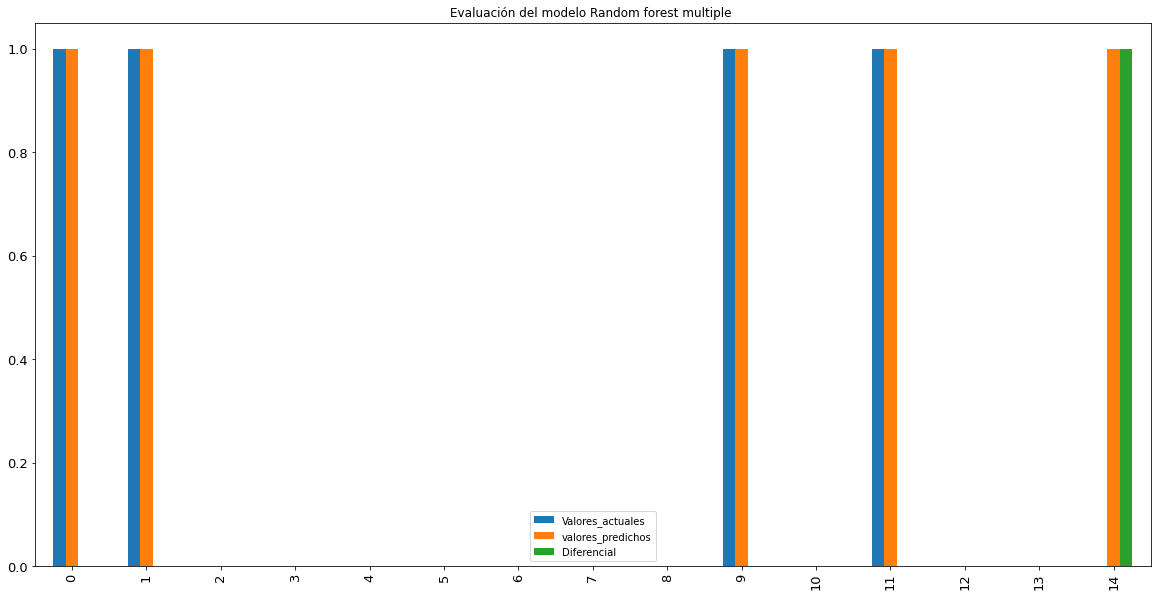

In [78]:
#comparativa de lo predicho contra la prueba
evaluate = pd.DataFrame({ 
    'Valores_actuales': y_test.values.flatten(),
    'valores_predichos': np.around(y_pred.flatten(),2),
    'Diferencial': np.around(y_pred.flatten(),2)-y_test.values.flatten()})
evaluate.head(15).plot(figsize=(20, 10), title = "Evaluación del modelo Random forest multiple ",fontsize= 13, kind='bar');

In [389]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion:')
print(matriz)

Matriz de confusion:
[[20918  1054]
 [ 3589  2878]]


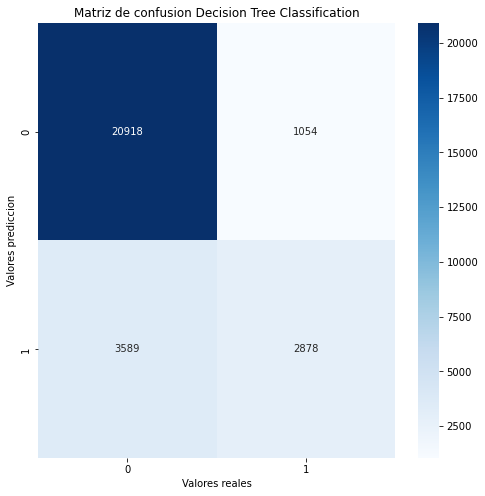

In [390]:
plt.figure(figsize=(8,8))

matriz = pd.DataFrame(confusion_matrix(y_test, y_pred))
matriz.index.name = 'Valores prediccion'
matriz.columns.name = 'Valores reales'
sns.heatmap(matriz, annot=True,fmt='d',cmap="Blues")

plt.title("Matriz de confusion Decision Tree Classification")
plt.show()


La matriz de confusion muestra 23796 datos predichos correctamente (20918 + 2878) y 4643 datos incorrectos (1054 + 3589)

En este caso, se distribuyen de la siguiente manera:

* En 20918 observaciones donde se declaraba que no llovería, el algoritmo predijo correctamente que no llovería.

* En 2878 observaciones donde el resultado era que llovería, el algoritmo predijo correctamente que llovería

* En 3589 observaciones donde se declaraba que no llovería, el algoritmo predijo incorrectamente que llovería

* En 1054 observaciones donde el resultado era que llovería, el algoritmo predijo incorrectamente que no lloveria.

# 6.2.1 Resultado del modelo - DecisionTreeClassification

In [391]:
acc_dtc = accuracy_score(y_test, y_pred)
prec_dtc = precision_score(y_test, y_pred)
print('Precision del modelo: ', prec_dtc)
print('Accuracy del modelo: ', acc_dtc)

Precision del modelo:  0.731943031536114
Accuracy del modelo:  0.8367382819367769


* La precision puede ser definida como el porcentaje de resultados positivos predecidos correctamente de todos los resultados positivos, es decir el modelo tuvo un 73% de exito al predecir los resultados positivos correctamente.

* El accuracy indica el porcentaje de predicciones correctas respecto al total de observaciones, en este caso el modelo obtuvo un 83% de predicciones correctas con respecto al total de predicciones realizadas.

Profundidad del árbol: 5
Número de nodos terminales: 32


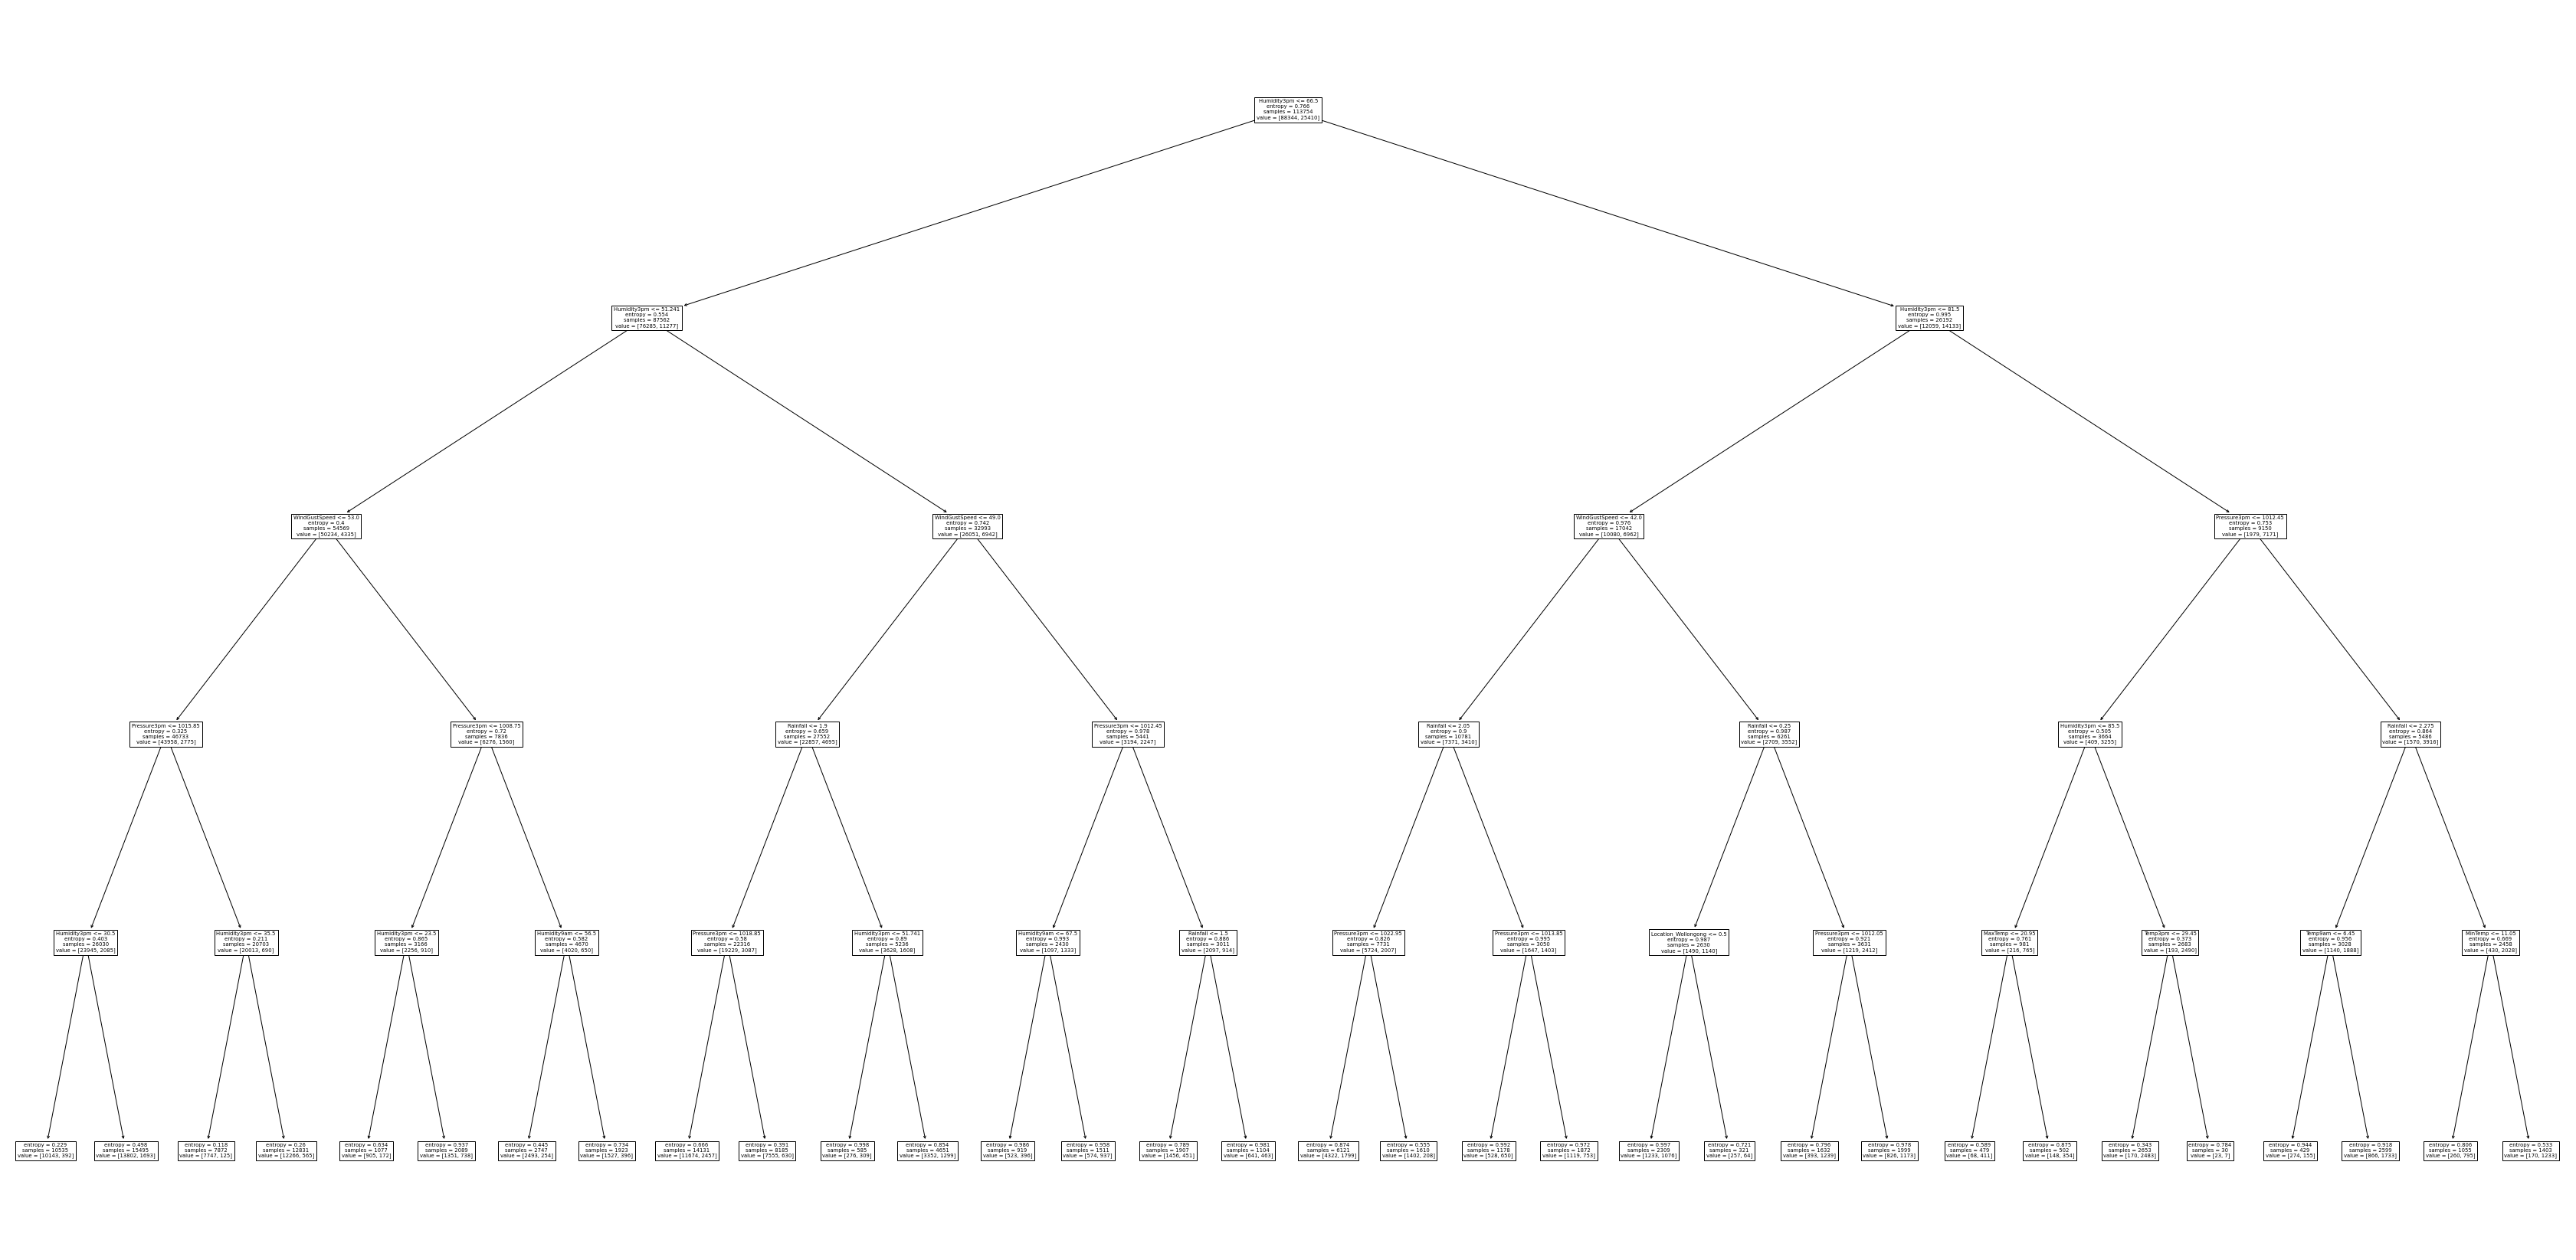

In [392]:
fig, ax = plt.subplots(figsize=(60, 30))

print(f"Profundidad del árbol: {modelo.get_depth()}") 

print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = 
                 modelo,feature_names = X.columns)
plt.show()

# 6.2.2 Comprobando si existe overfitting o underfitting

In [393]:
print(modelo.score(X_train,y_train))
print(modelo.score(X_test,y_test))

0.8384935914341474
0.8367382819367769


La accuracy obtenida en entrenamiento es de 83% mientras que en testing esta es similar, estos valores son comparables. Asi que podemos descartar el overfitting

# 7 Comparando los modelos

In [394]:
df_result = pd.DataFrame({'Modelos': ['NaiveBayes','DecisionTreeClassification'],
                          'Accuracy del modelo':[acc_nb,acc_dtc],
                          'Precision del modelo': [prec_nb,prec_dtc]
                         })
df_result

,Modelos,Accuracy del modelo,Precision del modelo
0,NaiveBayes,0.631281,0.346169
1,DecisionTreeClassification,0.836738,0.731943


Como se observa, el modelo con el algoritmo DecisionTreeClassification obtuvo mejores resultados, con un score de accuracy cercana al 83% y una precision del 73%. Por lo tanto, podemos concluir que el modelo tiene un buen desempeño a la hora de predecir si llovera al dia siguiente. Los resultados de ambos algoritmos se pueden mejorar y para eso se describe una serie de recomendaciones para conseguir resultados mejores.

Realizaremos 2 arreglos para ver si mejorara el resultado de nuerstros modelos:

* Eliminar outliers, ya que al tener valores atipicos estos pueden perjudicar a nuestro modelo a la hora de predecir.

* Normalizar los valores, de esta manera ayudaremos al algoritmo a procesar las observaciones con aun mas precisión.

# Modelos sin Outliers y normalizados con Min Max

In [395]:
df_Normalizado = data_weather[:]

In [396]:
df_Normalizado['RainTomorrow'] = df_Normalizado['RainTomorrow'].map( {'No':0, 'Yes': 1})

In [397]:
df_Normalizado['Location'] = pd.Categorical(df_Normalizado['Location'])
datasetDummies_Location = pd.get_dummies(df_Normalizado['Location'], prefix = 'Location')

df_Normalizado['WindGustDir'] = pd.Categorical(df_Normalizado['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(df_Normalizado['WindGustDir'], prefix = 'WindGustDir')

df_Normalizado['WindDir9am'] = pd.Categorical(df_Normalizado['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(df_Normalizado['WindDir9am'], prefix = 'WindDir9am')

df_Normalizado['WindDir3pm'] = pd.Categorical(df_Normalizado['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(df_Normalizado['WindDir3pm'], prefix = 'WindDir3pm')

df_Normalizado['RainToday'] = pd.Categorical(df_Normalizado['RainToday'])
datasetDummies_RainToday = pd.get_dummies(df_Normalizado['RainToday'], prefix = 'RainToday')

In [398]:
df_Normalizado.drop("Location", axis=1, inplace=True)
df_Normalizado.drop("WindGustDir", axis=1, inplace=True)
df_Normalizado.drop("WindDir9am", axis=1, inplace=True)
df_Normalizado.drop("WindDir3pm", axis=1, inplace=True)
df_Normalizado.drop("RainToday", axis=1, inplace=True)

df_Normalizado = pd.concat([df_Normalizado, datasetDummies_Location], axis=1)
df_Normalizado = pd.concat([df_Normalizado, datasetDummies_WindGustDir], axis=1)
df_Normalizado = pd.concat([df_Normalizado, datasetDummies_WindDir9am], axis=1)
df_Normalizado = pd.concat([df_Normalizado, datasetDummies_WindDir3pm], axis=1)
df_Normalizado = pd.concat([df_Normalizado, datasetDummies_RainToday], axis=1)

In [399]:
df_Normalizado['Date'] = pd.to_datetime(df_Normalizado['Date'])

df_Normalizado['Year'] = df_Normalizado['Date'].dt.year

df_Normalizado['Month'] = df_Normalizado['Date'].dt.month

# Eliminamos la columna anterior que contenia la fecha
df_Normalizado.drop('Date', axis=1, inplace = True)
#Creamos la variable season para ver la temporada segun el mes
df_Normalizado['Season'] = df_Normalizado['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Summer','Summer','Autumn','Autumn','Autumn','Winter','Winter','Winter','Spring','Spring','Spring','Summer'))

labelencoder = LabelEncoder()
df_Normalizado['Year'] = labelencoder.fit_transform(df_Normalizado['Year'])
df_Normalizado['Month'] = labelencoder.fit_transform(df_Normalizado['Month'])

df_Normalizado['Season'].replace(['Summer','Autumn','Winter','Spring'],[1,2,3,4],inplace = True)

df_Normalizado


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,Year,Month,Season
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,1,0,1,0,1,11,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,1,1,0,1,11,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,1,1,0,1,11,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,1,0,1,11,1
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,1,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,1,0,10,5,3
142189,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,1,0,10,5,3
142190,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,1,0,10,5,3
142191,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,1,0,1,0,10,5,3


# Normalizacion de datos

In [400]:
datos_min_max = preprocessing.MinMaxScaler().fit_transform(df_Normalizado)
datos_min_max

array([[0.51650943, 0.52362949, 0.00161725, ..., 0.1       , 1.        ,
        0.        ],
       [0.375     , 0.56521739, 0.        , ..., 0.1       , 1.        ,
        0.        ],
       [0.50471698, 0.57655955, 0.        , ..., 0.1       , 1.        ,
        0.        ],
       ...,
       [0.28537736, 0.56899811, 0.        , ..., 1.        , 0.45454545,
        0.66666667],
       [0.32783019, 0.59924386, 0.        , ..., 1.        , 0.45454545,
        0.66666667],
       [0.38443396, 0.60113422, 0.        , ..., 1.        , 0.45454545,
        0.66666667]])

In [401]:
datos_min_max = pd.DataFrame(datos_min_max)
datos_min_max

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.1,1.000000,0.000000
1,0.375000,0.565217,0.000000,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.1,1.000000,0.000000
2,0.504717,0.576560,0.000000,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.1,1.000000,0.000000
3,0.417453,0.620038,0.000000,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.1,1.000000,0.000000
4,0.613208,0.701323,0.002695,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.1,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.283019,0.502836,0.000000,0.193798,0.115385,0.149425,0.59,0.27,0.730579,0.7056,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.454545,0.666667
142189,0.266509,0.533081,0.000000,0.193798,0.100000,0.126437,0.51,0.24,0.728926,0.6912,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.454545,0.666667
142190,0.285377,0.568998,0.000000,0.124031,0.100000,0.103448,0.56,0.21,0.710744,0.6720,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.454545,0.666667
142191,0.327830,0.599244,0.000000,0.240310,0.069231,0.103448,0.53,0.24,0.669421,0.6352,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.454545,0.666667


# Eliminacion de Outliers

In [220]:
def Borra_outliers(Rainfall):
    a = []
    q1 = df_Normalizado[Rainfall].quantile(.25)
    q2 = df_Normalizado[Rainfall].quantile(.5)
    q3 = df_Normalizado[Rainfall].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df_Normalizado[Rainfall]:
        if i > ulim:
            i = np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a
for col in df_Normalizado.select_dtypes(exclude='object').columns:
    df_Normalizado[col] = Borra_outliers(col)

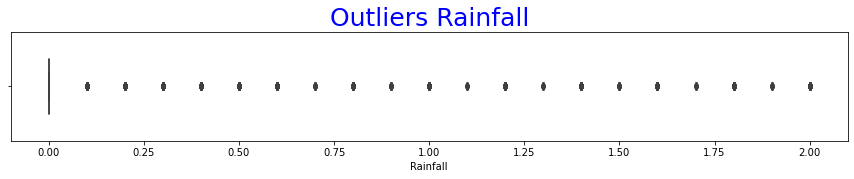

In [221]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_Normalizado["Rainfall"],fliersize=5, width=0.5)
plt.title("Outliers Rainfall",fontsize=25,color="blue")
plt.savefig('Outliers Rainfall.png')

In [249]:
def Borra_outliers(RISK_MM):
    a = []
    q1 = df_Normalizado[RISK_MM].quantile(.25)
    q2 = df_Normalizado[RISK_MM].quantile(.5)
    q3 = df_Normalizado[RISK_MM].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df_Normalizado[RISK_MM]:
        if i > ulim:
            i = np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a
for col in df_Normalizado.select_dtypes(exclude='object').columns:
    df_Normalizado[col] = Borra_outliers(col)

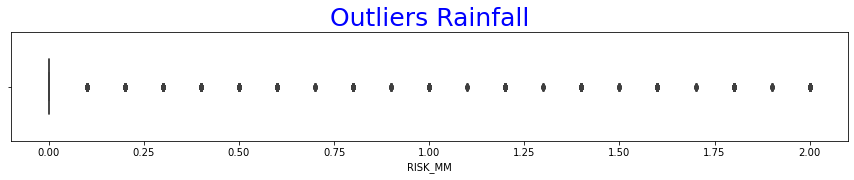

In [250]:
plt.figure(figsize=(15,2))
sns.boxplot(x=df_Normalizado["RISK_MM"],fliersize=5, width=0.5)
plt.title("Outliers RISK_MM",fontsize=25,color="blue")
plt.savefig('Outliers RISK_MM.png')

In [402]:
X = df_Normalizado.drop(['RainTomorrow','RISK_MM','Year','Month'], axis=1)
y = df_Normalizado['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print(X_train.shape)
print(X_test.shape)

(113754, 112)
(28439, 112)


In [403]:
# Creacion del modelo
modelo2 = GaussianNB()
# Entrenamiento del modelo
modelo2.fit(X_train, y_train)
# Validacion 
y_pred = modelo2.predict(X_test)

In [404]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion:')
print(matriz)

Matriz de confusion:
[[13432  8540]
 [ 1944  4523]]


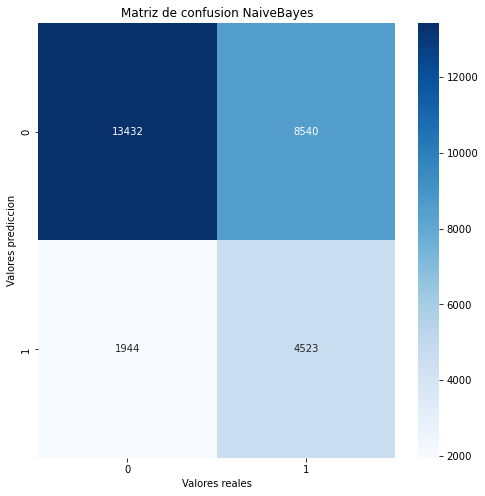

In [405]:
plt.figure(figsize=(8,8))

matriz = pd.DataFrame(confusion_matrix(y_test, y_pred))
matriz.index.name = 'Valores prediccion'
matriz.columns.name = 'Valores reales'

sns.heatmap(matriz, annot=True,fmt='d',cmap="Blues")

plt.title("Matriz de confusion NaiveBayes")
plt.show()

La matriz de confusion muestra 17950 datos predichos correctamente (13432 + 4523) y 10484 datos incorrectos (8540 + 1944)

En este caso, se distribuyen de la siguiente manera:

* En 13432 observaciones donde se declaraba que no llovería, el algoritmo predijo correctamente que no llovería.
* En 4523 observaciones donde el resultado era que llovería, el algoritmo predijo correctamente que llovería
* En 1944 observaciones donde se declaraba que no llovería, el algoritmo predijo incorrectamente que llovería
* En 8540 observaciones donde el resultado era que llovería, el algoritmo predijo incorrectamente que no lloveria.

In [406]:
acc_nb2 = accuracy_score(y_test, y_pred)
prec_nb2 = precision_score(y_test, y_pred)
print('Precision del modelo: ', prec_nb2)
print('Accuracy del modelo: ', acc_nb2)

Precision del modelo:  0.3462451198040266
Accuracy del modelo:  0.6313513133373184


In [407]:
print(modelo2.score(X_train,y_train))
print(modelo2.score(X_test,y_test))

0.6329008210700283
0.6313513133373184


In [408]:
# Creacion del modelo
modelo2 = DecisionTreeClassifier(random_state=11,max_depth=5, criterion='entropy')
# Entrenar el modelo
modelo2.fit(X_train, y_train)
# Validacion del modelo
y_pred = modelo2.predict(X_test)

In [409]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de confusion:')
print(matriz)

Matriz de confusion:
[[20918  1054]
 [ 3589  2878]]


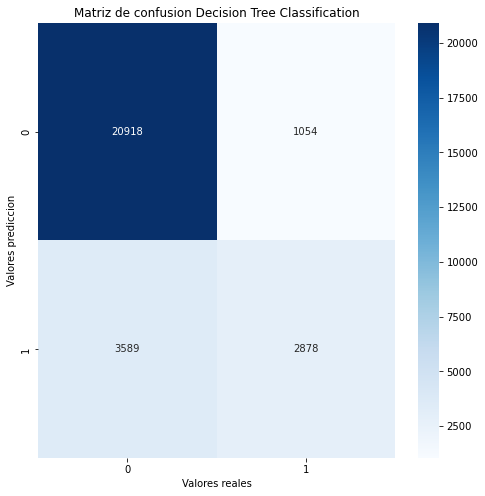

In [410]:
plt.figure(figsize=(8,8))

matriz = pd.DataFrame(confusion_matrix(y_test, y_pred))
matriz.index.name = 'Valores prediccion'
matriz.columns.name = 'Valores reales'
sns.heatmap(matriz, annot=True,fmt='d',cmap="Blues")

plt.title("Matriz de confusion Decision Tree Classification")
plt.show()

La matriz de confusion muestra 23796 datos predichos correctamente (20918 + 2878) y 4643 datos incorrectos (1054 + 3589)

En este caso, se distribuyen de la siguiente manera:

* En 20918 observaciones donde se declaraba que no llovería, el algoritmo predijo correctamente que no llovería.
* En 2878 observaciones donde el resultado era que llovería, el algoritmo predijo correctamente que llovería
* En 3589 observaciones donde se declaraba que no llovería, el algoritmo predijo incorrectamente que llovería
* En 1054 observaciones donde el resultado era que llovería, el algoritmo predijo incorrectamente que no lloveria.

In [411]:
acc_dtc2 = accuracy_score(y_test, y_pred)
prec_dtc2 = precision_score(y_test, y_pred)
print('Precision del modelo: ', prec_dtc2)
print('Accuracy del modelo: ', acc_dtc2)

Precision del modelo:  0.731943031536114
Accuracy del modelo:  0.8367382819367769


Profundidad del árbol: 5
Número de nodos terminales: 32


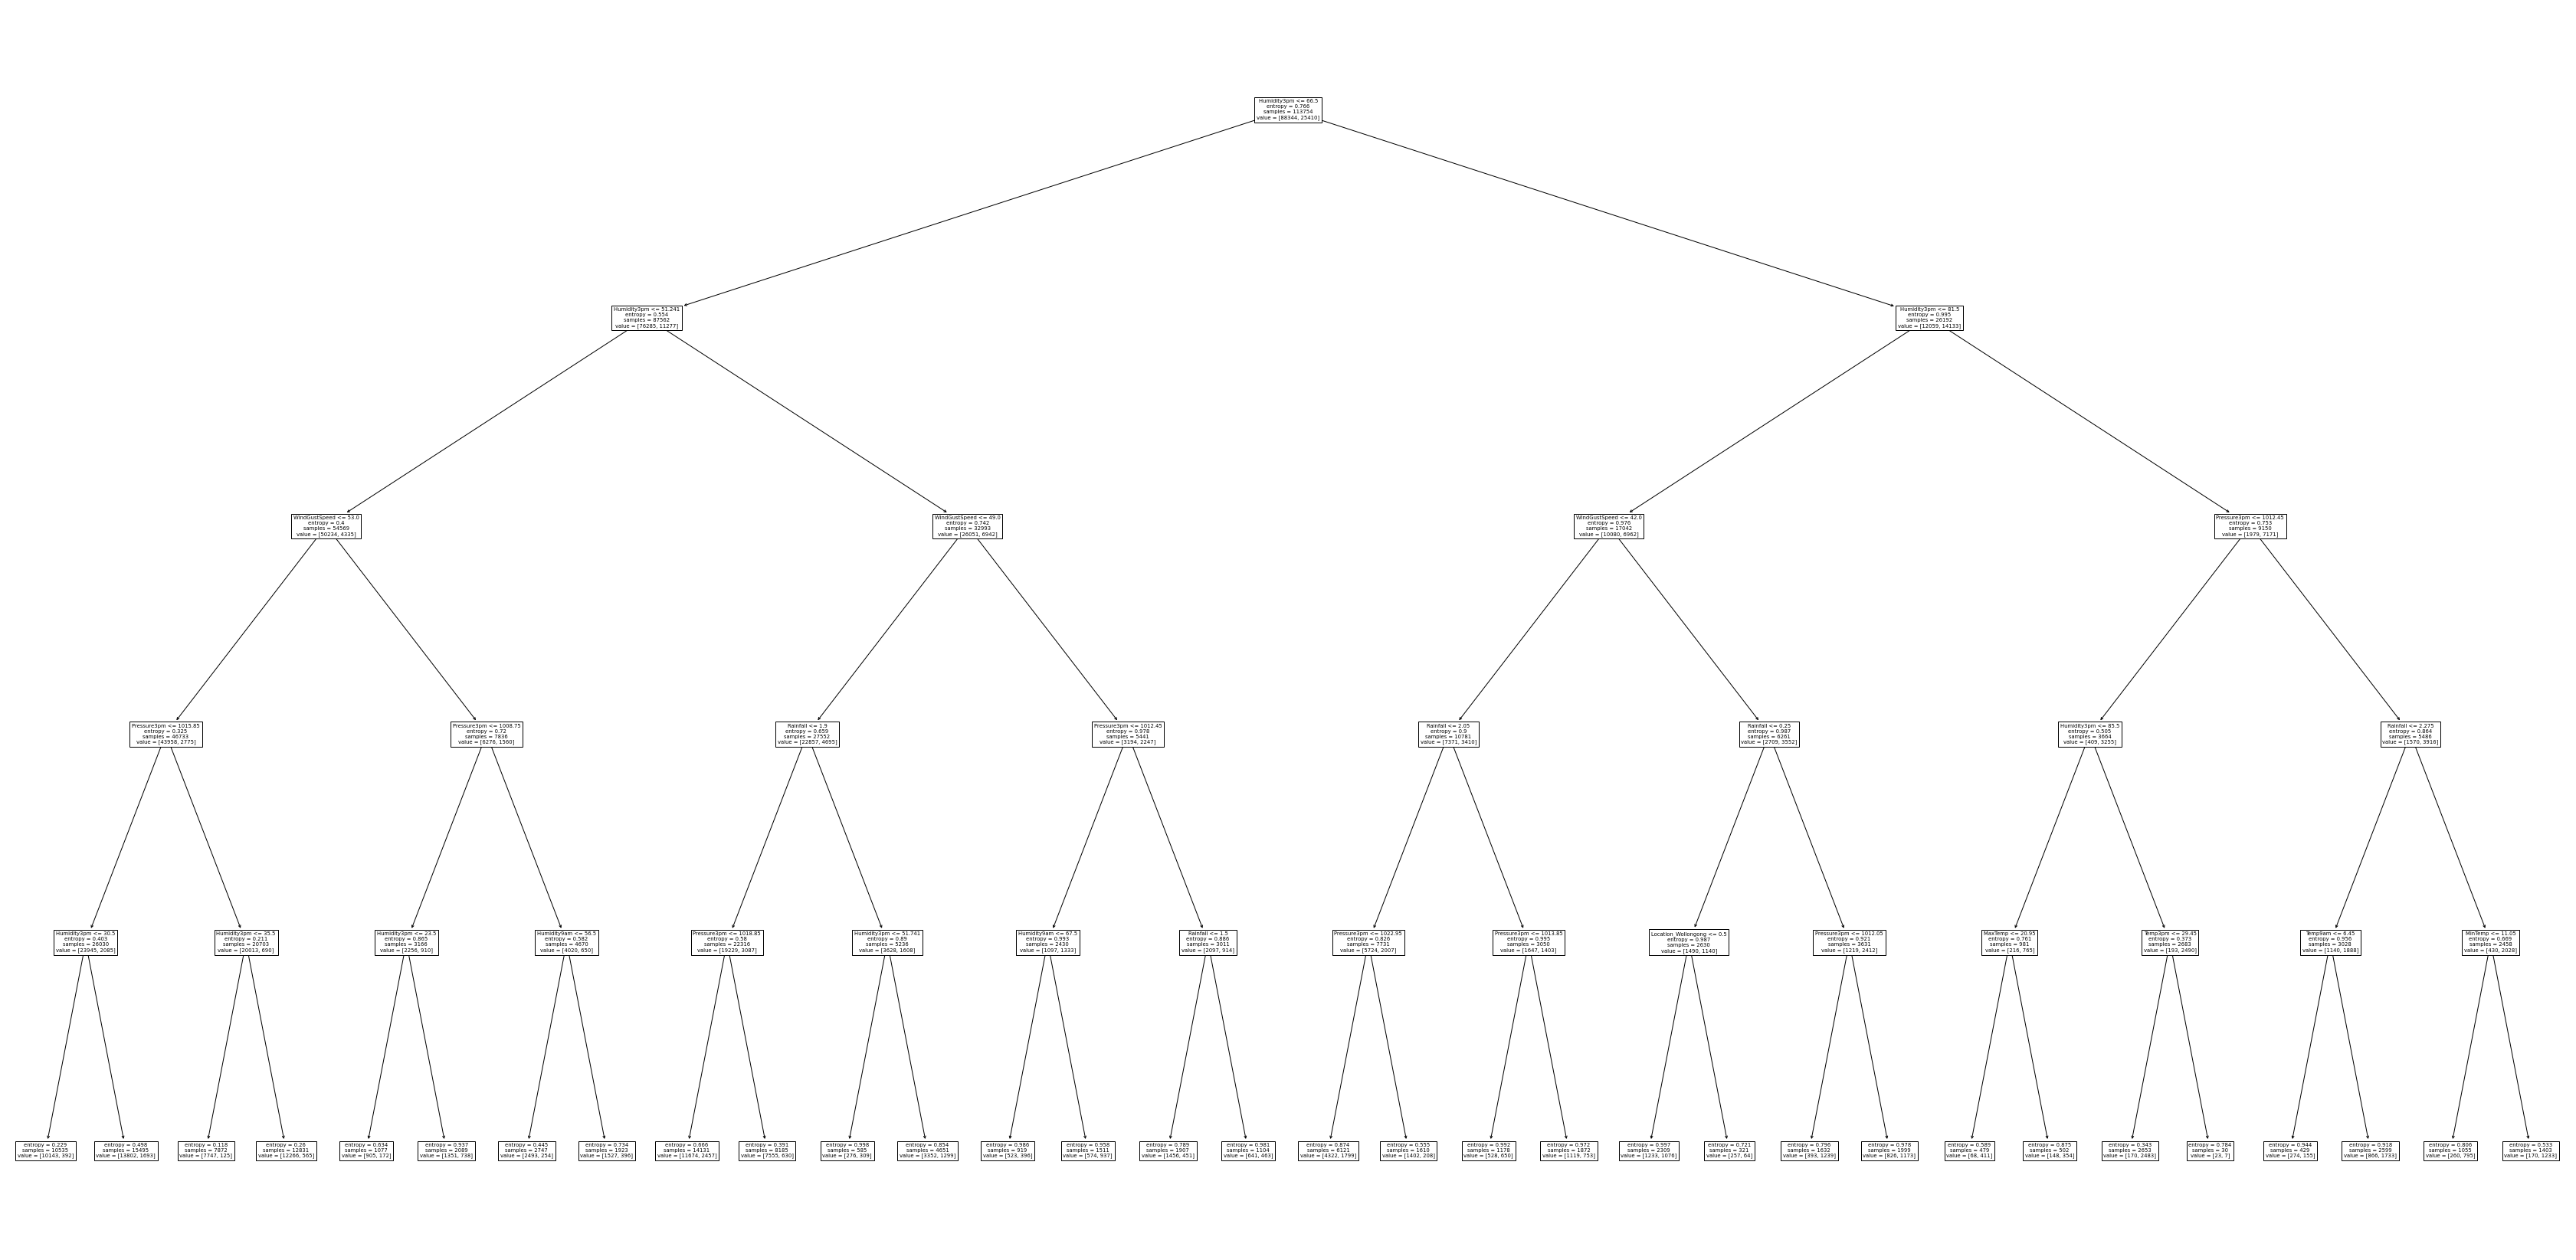

In [412]:
fig, ax = plt.subplots(figsize=(60, 30))

print(f"Profundidad del árbol: {modelo.get_depth()}") 

print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = 
                 modelo,feature_names = X.columns)
plt.show()

In [413]:
print(modelo2.score(X_train,y_train))
print(modelo2.score(X_test,y_test))

0.8384935914341474
0.8367382819367769


In [414]:
df_resulta = pd.DataFrame({'Modelos': ['DecisionTreeClassification','DecisionTreeClassification'],
                          'Accuracy del modelo':[acc_dtc2,acc_dtc],
                          'Precision del modelo': [prec_dtc2,prec_dtc]
                         })
df_resulta

,Modelos,Accuracy del modelo,Precision del modelo
0,DecisionTreeClassification,0.836738,0.731943
1,DecisionTreeClassification,0.836738,0.731943


In [415]:
df_result = pd.DataFrame({'Modelos': ['NaiveBayes','NaiveBayes'],
                          'Accuracy del modelo':[acc_nb,acc_nb2],
                          'Precision del modelo': [prec_nb,prec_nb2]
                         })
df_result

,Modelos,Accuracy del modelo,Precision del modelo
0,NaiveBayes,0.631281,0.346169
1,NaiveBayes,0.631351,0.346245


# Observaciones

Como podemos ver el modelo DecisionTreeClassification sigue siendo el mejor modelo con un score de accuracy cercana al 83%, ademas podemos observar **que no hubo una diferencia significativa con los ajustes realizados** que fueron **Eliminar outliers y Normalizar los valores**